<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 371D Homework 7

Olivia Fan, Frankie Willard, Sam Carpenter

### Problem 0 (3 points)

## Part 1: The Representer Theorem 

### Problem 1.1 (Exam Style)

The Representer Theorem applies for this loss function, because 
$$ L(v) = L(w,b) = L_T(v) + \mu ||v|| ^2 \\
= \frac{1}{N}\sum_{n=1}^{N} l(y_n,s(x_n))+ \mu ||v|| ^2 $$
Because $\mu$ is a small positive number, $\mu ||v|| ^2$ must be strictly increasing.
<br> Because $f(\alpha(x)) = f(b+wx)$, $\frac{1}{N}\sum_{n=1}^{N} l(y_n,s(x_n))$ is a function of $wx+b$
<br> Therefore $\frac{1}{N}\sum_{n=1}^{N} l(y_n,s(x_n)) = S(w^Tx1+b, ..., w^Tx_N+b) $
<br> Therefore, the Representer Theroem applies for the loss function, and the the logistic-regression classifier is a linear combination of the data points $x_1, ...,x_N$ in the training set.

### Problem 1.2 (Exam Style)

There always exists as least one optimal solution $w^*$ that can be written as a linear combination of the data points $x_n$ in the new scenario.
<br> Proof by contradiction:
<br> If $w^* = \sum_{n=1}^{N}\beta_n x_n+u $ where $x = Span(x_1,...,x_N)$ and $u ∈ X^\perp$, then $u = 0$
<br> By contradiction, assume $u\neq 0$
<br> $R(⋅)$ is the zero function, so therefore $R(||w||)=R(||w^*||)$
<br> Since $u \perp x_n$, we have 
<br> $w^Tx_n+b = (w^*-u)^Tx_n+b = (w^*)^Tx_n-u^Tx_n+b = (w^*)^Tx_n+b$
<br> so that $S(w^Tx_1+b,..., w^Tx_N+b) = S((w^*)^Tx_1+b,...,(w^*)^Tx_N+b) $ 
<br> $\Rightarrow L(w) = L(w^*)$ Also by the fact that the logistic-regression classifier is weakly convex, the optimal risk should be unique
<br> Therefore $u=0$ and there always exists at least one optimal $w^*$ that is is a linear combination of the data points.
<br> The part of the representer theorem that still holds: S not affected to by adding to any vector w a vector u in the orthogonal complement of space X spanned by the data points,
<br> Therefore, since the risk function is weakly convex, the value of the optimal risk is unique, but there may be multiple optimal vectors w that yield the unique optimal risk.
<br> In conclusion, there always exists at least one optimal solution $w*$ that can be written as the linear combination.

## Part 2: Function Convexity and Composition 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


def plot(fct, x, title=None, pair=None, font_size=18):
    y = fct(x)
    plt.figure(figsize=(15, 5), tight_layout=True)
    plt.plot(x, y)
    if pair is not None:
        a, b = pair
        f_pair = fct(a), fct(b)
        plt.plot(pair, f_pair)
    if title is not None:
        plt.title(title, fontsize=font_size)
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    plt.show()

### Problem 2.1 (Exam Style)

$$
\text{Let D be the domain of all positive real numbers} (0, \infty) \\
\text{Convex everywhere}: -x^{1/3}\\
\text{Convex everywhere}: x^2\\
f(x)= -x^{1/3}\\
g(x)= x^2\\
f(g(x)) = -(x^2)^{1/3} = -x^{2/3}\\
g(f(x)) = (-x^{1/3})^2= x^{2/3}\\
$$

A function f is strictly convex at a point if it's second derivative is positive, and weakly convex if it's second derivative is non-negative.

$$
\frac{d^2}{dx^2} f(g(x))\\
=\frac{d^2}{dx^2} -x^{2/3}\\
=\frac{d}{dx}-\frac{2}{3}x^{-1/3} \\
=\frac{2}{9}x^{-4/3} \\
\frac{2}{9}x^{-4/3} \text{>0 for all} x ∈(0,\infty)\\
\text{Thus, f(g(x)) is strictly convex for D}\\
\frac{d^2}{dx^2} g(f(x))\\
=\frac{d^2}{dx^2} x^{2/3}\\
=\frac{d}{dx} \frac{2}{3} x^{-1/3}\\
= -\frac{2}{9}x^{-4/3}\\
-\frac{2}{9}x^{-4/3}\text{<0 for all x}\\
\text{Thus, g(f(x)) is neither strictly nor weakly convex for D}\\
$$

In [2]:
def fgx(x):
    return np.multiply(np.power(x, 2/3),-1)

In [3]:
def gfx(x):
    return np.power(x, 2/3)

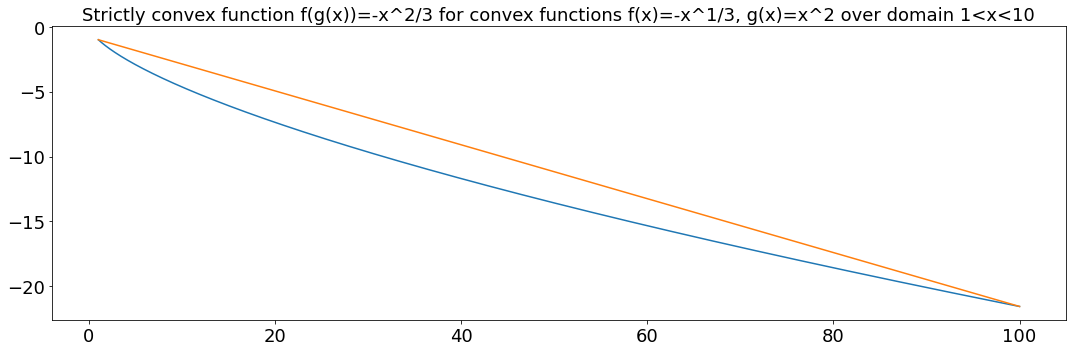

In [4]:
x = np.linspace(1, 100, 10000)
plot(fgx, x, title="Strictly convex function f(g(x))=-x^2/3 for convex functions f(x)=-x^1/3, g(x)=x^2 over domain 1<x<10", pair=[1,100])

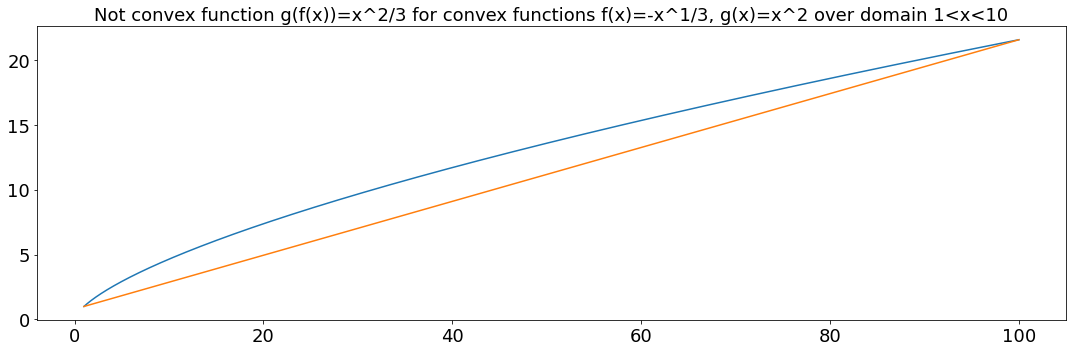

In [5]:
plot(gfx, x, title="Not convex function g(f(x))=x^2/3 for convex functions f(x)=-x^1/3, g(x)=x^2 over domain 1<x<10", pair=[1,100])

### Problem 2.2 (Exam Style)

Because f is strictly convex everywhere, by definition
$$f(\lambda x+(1-\lambda)y)<\lambda f(x)+(1-\lambda)f(y)$$
And because g is monotonically increasing everywhere on R,
$$g(f(\lambda x+(1-\lambda)y)) < g(\lambda f(x)+(1-\lambda)f(y))$$
Because g is at least weakly convex, by definition
$$g(\lambda f(x)+(1-\lambda)f(y)) \leq \lambda g(f(x))+(1-\lambda)g(f(y)) = \lambda h(x)+(1-\lambda)h(y) $$
Therefore
$$h(\lambda x+(1-\lambda)y) \\
= g(f(\lambda x+(1-\lambda)y)) < \lambda g(f(x))+(1-\lambda)g(f(y)) \\
h(\lambda x+(1-\lambda)y) < \lambda h(x)+(1-\lambda)h(y)$$
h(x) is strictly convex, as desired

### Problem 2.3 (Exam Style)

By defintion, if g is either weakly or strictly convex everywhere on R,
$$g(\lambda (wz+c)+ (1-\lambda)(wz'+c)) \leq \lambda g(wz+c)+ (1-\lambda)(wz'+c) \\
\text{the left hand side could be simplified as }\\
g(\lambda (wz+c)+ (1-\lambda)(wz'+c)) = g(\lambda wz+\lambda c+ (wz'+c) -\lambda wz' - \lambda c))\\
= g(w(\lambda z +(1-\lambda)z')+c) = h(\lambda z +(1-\lambda)z')$$
Right hand side $$\lambda g(wz+c)+ (1-\lambda)(wz'+c) = \lambda h(x)+(1-\lambda)h(y) $$
Therefore, 
$$h(\lambda z +(1-\lambda)z') \leq \lambda h(x)+(1-\lambda)h(y)$$
The less than or equal sign takes the smaller than sign if g is strictly convex everywhere on R

### Problem 2.4 (Exam Style)

$$\text{affine univariate scalar function }f(x) = -x+1\\
\text{strictly convex function}g(x)=x^2\\
\text{g(x) is strictly convex everywhere because } \frac{dg^2}{d^2x}=2>0 \text{ everywhere on } R\\
h(x) = g(f(x)) = (-x+1)^2\\
\frac{dh^2}{d^2x} = \frac{d^2}{dx^2} (x-1)^2 = \frac{d^2}{dx^2} (x^2-2x+1)\\
= \frac{d}{dx}(2x-2) = 2 > 0$$
therefore, f and g satisfies the conditions in the previous problem that h(x) has the same convexity as g
$$f(g(x)) = -x^2+1 \\
\frac{d^2}{dx^2} -x^2+1  = \frac{d}{dx} -2x = -2 <0\\
$$
Therefore f(g(x)) is not convex everywhere, as desired

## Part 3: Support Vector Machines 

In [6]:
from urllib.request import urlretrieve
from os import path as osp


def retrieve(file_name, semester='fall21', course='371d', homework=7):
    if osp.exists(file_name):
        print('Using previously downloaded file {}'.format(file_name))
    else:
        fmt = 'https://www2.cs.duke.edu/courses/{}/compsci{}/homework/{}/{}'
        url = fmt.format(semester, course, homework, file_name)
        urlretrieve(url, file_name)
        print('Downloaded file {}'.format(file_name))

In [7]:
import pickle

retrieve('data.pickle')
with open('data.pickle', 'rb') as file:
    data = pickle.load(file)

Using previously downloaded file data.pickle


In [8]:
c_values = [0.0001, 0.001, 0.01, 0.1, 1., 10., 100.]

### Problem 3.1

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

classifier = SVC(kernel='rbf', gamma='auto')
hyper_parameters = {'C': c_values}
folds = 15
c = GridSearchCV(classifier, hyper_parameters, scoring='accuracy', cv=folds)

In [10]:
import pandas as pd
import matplotlib.markers as mpl_markers

In [11]:
def plot_svm_general(h, split, split_type):
    #pyplot.contour
    #h.decision_function
    plt.figure(figsize=(10,10))

    #dec_function = h.decision_function(split['x'])


    best_C = h.best_params_['C']
    #data['train']['x'][:,0]
  
    outputs = []
    for i in range(len(split['x'])):
        pred = h.predict(split['x'][i].reshape(1,-1))
        real = split['y'][i]
        if pred == real:
            if pred == 1:
                outputs.append('TP')
            else:
                outputs.append('TN')
        else:
            if pred == 1:
                outputs.append('FP')
            else:
                outputs.append('FN')

    my_df = pd.DataFrame(dict(output=outputs))

    colormap = {
      'TP' : 'blue',
      'TN' : 'red',
      'FP' : 'red',
      'FN' : 'blue'
    }

    markermap = {
      'TP' : 'o',
      'TN' : 'o',
      'FP' : 'v',
      'FN' : 'v'
    }

    sv_indices = h.best_estimator_.support_

    if split_type == "test":
        sv_indices = []

    for i in range(len(split['x'])):
        my_fill_style = u'full' if i in sv_indices else u'none'
      #plt.scatter(data['train']['x'][i][0], data['train']['x'][i][1],
      #            c=colormap[my_df['output'][i]], marker= mpl_markers.MarkerStyle(markermap[my_df['output'][i]], fillstyle=my_fill_style))
        plt.plot(split['x'][i][0], split['x'][i][1],
                  c=colormap[my_df['output'][i]], marker= markermap[my_df['output'][i]], fillstyle=my_fill_style)
  #plt.scatter(data['train']['x'][:,0], data['train']['x'][:,1], c=my_df["output"].map(colormap), marker= markermap[str(my_df['output'])])

    XX,YY = np.meshgrid(np.arange(split['x'][:,0].min()-0.1,split['x'][:,0].max()+0.1,0.02),
                      np.arange(split['x'][:,1].min()-0.1,split['x'][:,1].max()+0.1,0.02))
  
  #reconstructed = {'x':np.stack((XX.ravel(), YY.ravel()),axis=1), 'y': data['train']['y']}
    reconstructed = np.stack((XX.ravel(), YY.ravel()),axis=1)

  #cmap=plt.cm.RdBu, alpha=0.5

    plt.contourf(XX,YY,h.predict(reconstructed).reshape(XX.shape),cmap=plt.cm.RdBu, alpha=0.5)

  #h.decision_function(split['x'])

  #plt.contour(XX,YY,h.predict(reconstructed).reshape(XX.shape))

    plt.contour(XX,YY,h.decision_function(reconstructed).reshape(XX.shape), levels=[-1,0,1], linestyles=['--','-','--'])

    plt.title("RBF SVM with C = {best_c} on {split} data".format(best_c=best_C, split=split_type))
    return

In [12]:
def print_accuracy(h):
    train_accuracy = h.score(data['train']['x'], data['train']['y']) * 100
    test_accuracy = h.score(data['test']['x'], data['test']['y']) * 100
    num_svs = len(h.best_estimator_.support_)
    print("Train accuracy: {accuracy}".format(accuracy=train_accuracy))
    print("Test accuracy: {accuracy}".format(accuracy=test_accuracy))
    print("Number of support vectors: {svs}".format(svs=num_svs))

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

classifier = SVC(kernel='rbf', gamma='auto')
hyper_parameters = {'C': c_values}
folds = 15
c = GridSearchCV(classifier, hyper_parameters, scoring='accuracy', cv=folds)

In [14]:
h = c.fit(data['train']['x'], data['train']['y'])

In [15]:
print_accuracy(h)

Train accuracy: 91.3
Test accuracy: 91.60000000000001
Number of support vectors: 309


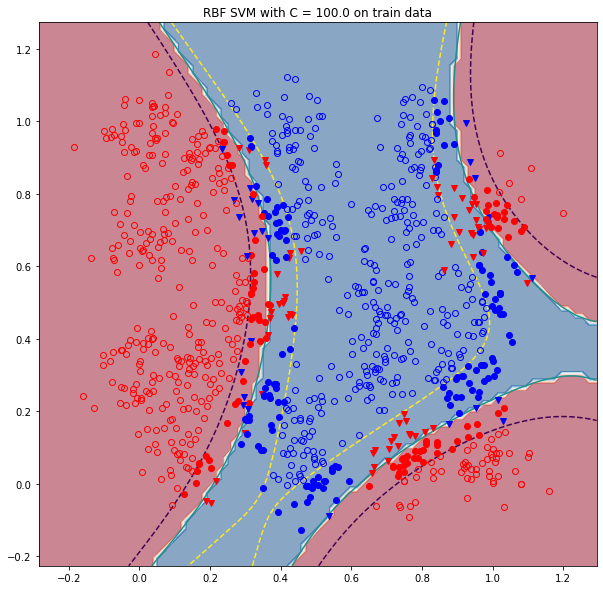

In [16]:
plot_svm_general(h, data['train'], "train")

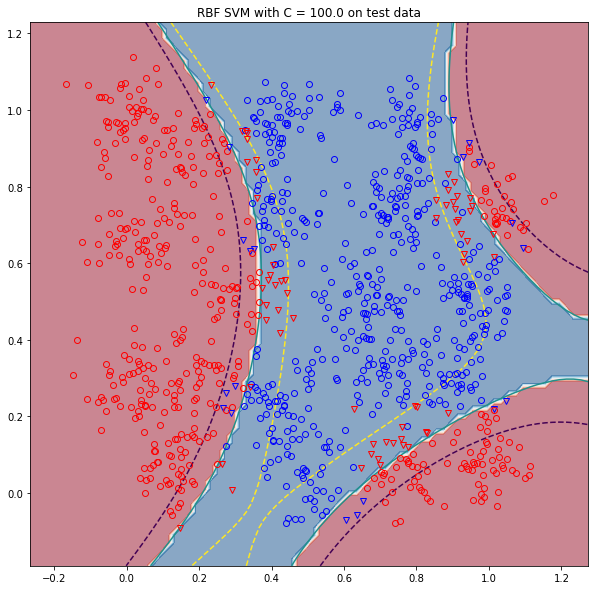

In [17]:
plot_svm_general(h, data['test'], "test")

### Problem 3.2 (Exam Style)

The testing and training are very similar and that it performed well on both so it generally did not overfit, however it did not get 100% accuracy on train and perhaps may be slightly underfit.
The RBF SVM classifier does not overfit, because test accuracy is very close to training accuracy. However, the RBF SVM does significantly better than the linear SVM, which achieved accuracies in the low 70s.